In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/svm-classification/SVM_Classification.R
/kaggle/input/svm-classification/Activity Sheet.docx
/kaggle/input/svm-classification/UniversalBank.csv


In [2]:
data = pd.read_csv('/kaggle/input/svm-classification/UniversalBank.csv')

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
import pandas_profiling

In [6]:
data.profile_report(title='data')

In [7]:
import matplotlib.pyplot as plt


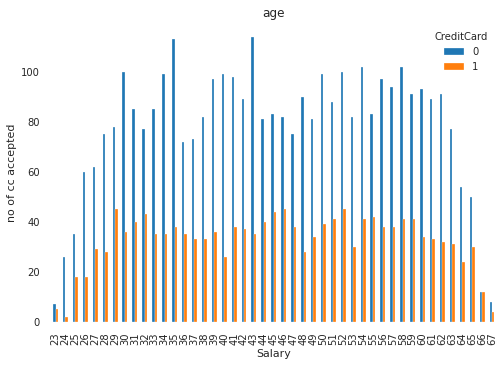

In [8]:
pd.crosstab(data.Age,data.CreditCard).plot(kind='bar')
plt.title('age')
plt.xlabel('Salary')
plt.ylabel('no of cc accepted')
plt.show()

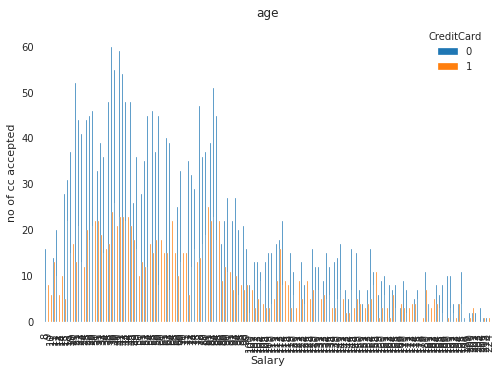

In [9]:
pd.crosstab(data.Income,data.CreditCard).plot(kind='bar')
plt.title('age')
plt.xlabel('Salary')
plt.ylabel('no of cc accepted')
plt.show()

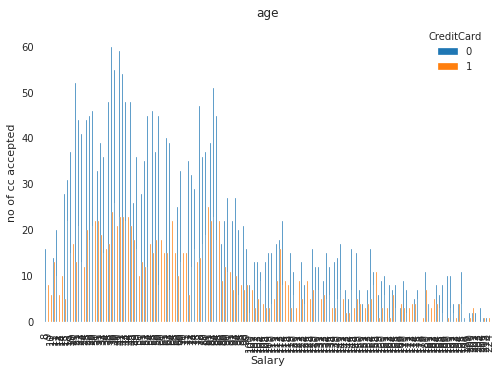

In [10]:
pd.crosstab(data.Income,data.CreditCard).plot(kind='bar')
plt.title('age')
plt.xlabel('Salary')
plt.ylabel('no of cc accepted')
plt.show()

In [11]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
X = data.drop(columns=['ID', 'ZIP Code'], axis=1)

In [13]:
y = X['CreditCard']

In [14]:
X = X.drop(columns=['CreditCard'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,
                                                    stratify=y)

In [16]:
from sklearn.svm import SVC

In [17]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
preds = clf.predict(X_test)
preds_og = clf.predict(X_train)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
test_acc = accuracy_score(y_test, preds)
train_acc = accuracy_score(y_train, preds_og)

In [21]:
print(test_acc, train_acc)

0.706 0.706


In [22]:
from ipywidgets import interactive, IntSlider, FloatSlider, interact

In [ ]:
@interact
def svc(c=IntSlider(min=0.5, max=2, value=1, continuous_update=False),
        break_ties_ = [True, False],
        decision_function_shape_ = ['ovo', 'ovr'],
        degree_=IntSlider(min=1,max=5,value=1,continuous_update=False),
        gamma_ = ['scale', 'auto'],
        kernel_ = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        shrinking_ = [True, False]):
    
    estimator = SVC(C=c,
#                     break_ties = break_ties_,
                    decision_function_shape = decision_function_shape_,
                    degree = degree_,
#                     gamma = gamma_,
                    kernel = kernel_,
                    shrinking = shrinking_)
    estimator.fit(X_train, y_train)

    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    
    return estimator

interactive(children=(IntSlider(value=1, continuous_update=False, description='c', max=2), Dropdown(descriptio…